# Introduction to Partial Differential Equations (PDEs) for Spatial Population Modeling

Partial Differential Equations (PDEs) are essential tools in mathematical modeling, enabling the description of various phenomena involving functions of multiple variables and their partial derivatives. Unlike Ordinary Differential Equations (ODEs), which involve derivatives with respect to a single variable, PDEs handle changes across multiple dimensions, such as time and space.

## PDEs in Spatial Modeling

In spatial population modeling, PDEs are used to represent how population density evolves over time and space, taking into account factors like natural growth, dispersion, and environmental influences. A common PDE used in such models is the diffusion equation.

## The Diffusion Equation

The diffusion equation models the spread of a population in space, reflecting the movement from high-density to low-density areas:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

- $u(x, t)$: Population density at position $x$ and time $t$.
- $D$: Diffusion coefficient, indicating the rate of spread.

This equation is analogous to heat diffusion, representing how populations disperse over time.


## 1D diffusion

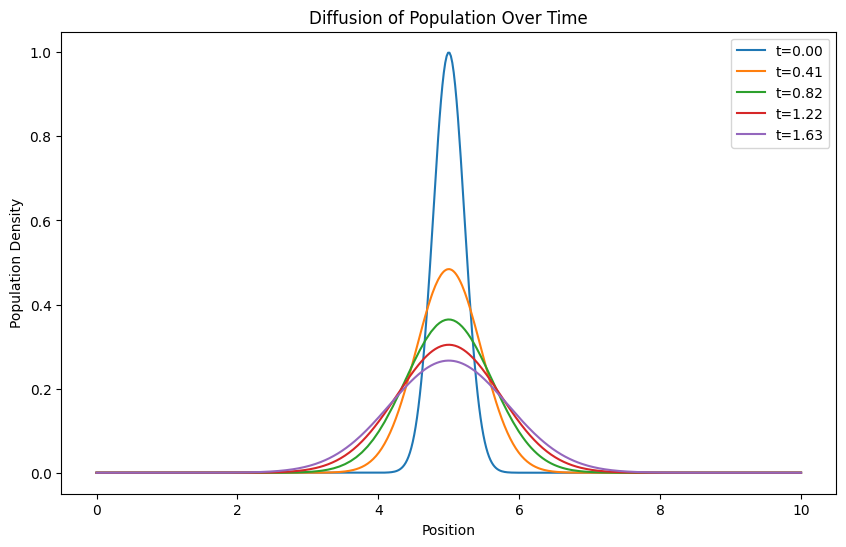

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Spatial domain
L = 10  # Length of the domain
Nx = 500  # Number of spatial points
x = np.linspace(0, L, Nx)  # Spatial grid
dx = x[1] - x[0]  # Spatial step size

# Diffusion coefficient
D = 0.2

# Initial population distribution: centered at L/2
u_initial = np.exp(-((x - L/2)**2) / 0.1)

# Diffusion equation as a system of ODEs
def diffusion(t, u):
    dudx2 = np.zeros(Nx)
    dudx2[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    # Neumann boundary conditions: zero flux at the boundaries
    dudx2[0] = dudx2[1]
    dudx2[-1] = dudx2[-2]
    return D * dudx2

# Time integration
t_eval = np.linspace(0, 2, 50)  # Time points to solve the PDE
sol = solve_ivp(diffusion, [0, 2], u_initial, method='RK45', t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(0, len(t_eval), 10):
    plt.plot(x, sol.y[:, i], label=f't={t_eval[i]:.2f}')
plt.xlabel('Position')
plt.ylabel('Population Density')
plt.legend()
plt.title('Diffusion of Population Over Time')
plt.show()


## 2D Diffusion Simulation

The 2D diffusion equation extends the concept of diffusion to two spatial dimensions, modeling the spread of a substance over a plane. It is represented as:

$$
\frac{\partial u}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

where $u(x, y, t)$ represents the concentration of the substance at position $(x, y)$ and time $t$, and $D$ is the diffusion coefficient.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def simulate_2d_diffusion(initial_state, D, dt, steps):
    """
    Simulates 2D diffusion process.
    
    Parameters:
    - initial_state: Initial concentration grid.
    - D: Diffusion coefficient.
    - dt: Time step.
    - steps: Number of simulation steps.
    
    Returns:
    - Final state after diffusion.
    """
    state = initial_state.copy()
    for _ in range(steps):
        state = state + D * gaussian_filter(state, sigma=1, mode='constant') * dt
    return state


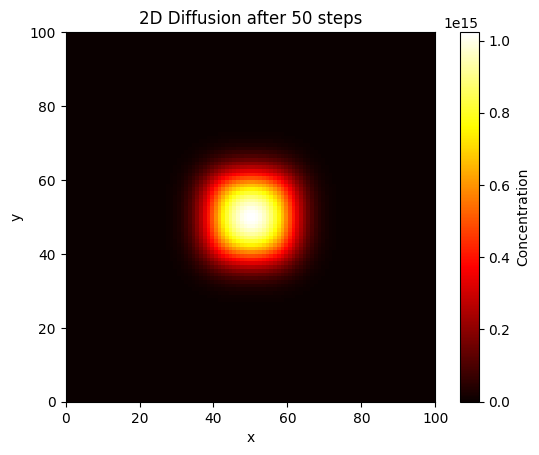

In [3]:
# Example usage
Lx, Ly = 100, 100  # Dimensions of the grid
initial_state = np.zeros((Lx, Ly))
initial_state[Lx//2 - 10:Lx//2 + 10, Ly//2 - 10:Ly//2 + 10] = 1  # Initial concentration block

# Simulation parameters
D = 1.0  # Diffusion coefficient
dt = 1.0  # Time step
steps = 50  # Number of steps

# Simulate
final_state = simulate_2d_diffusion(initial_state, D, dt, steps)

# Plotting
plt.imshow(final_state, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot')
plt.colorbar(label='Concentration')
plt.title('2D Diffusion after {} steps'.format(steps))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## saving intermediate stepsimport numpy as np

In [4]:
def simulate_2d_diffusion2(initial_state, D, dt, steps):
    states = [initial_state]
    for _ in range(steps):
        new_state = states[-1] + D * gaussian_filter(states[-1], sigma=1, mode='constant') * dt
        states.append(new_state)
    return states

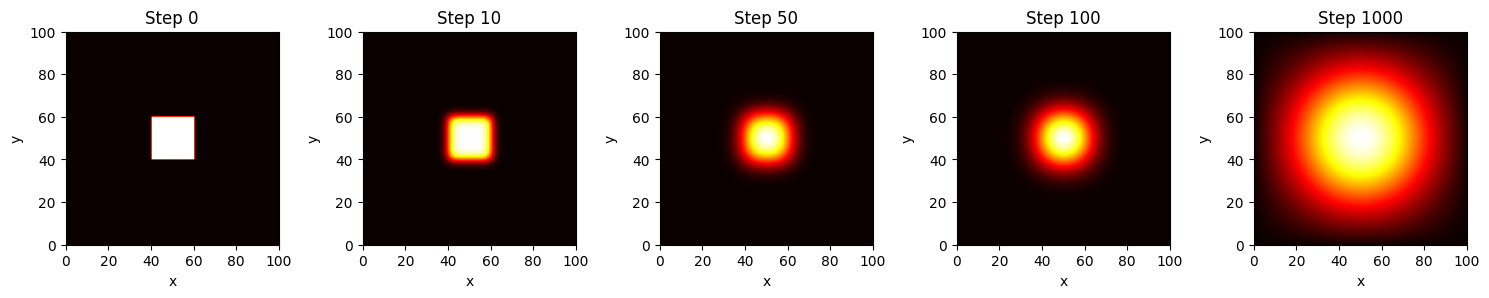

In [5]:
# Example usage
Lx, Ly = 100, 100  # Dimensions of the grid
initial_state = np.zeros((Lx, Ly))
initial_state[Lx//2 - 10:Lx//2 + 10, Ly//2 - 10:Ly//2 + 10] = 1  # Initial concentration block

# Simulation parameters
D = 1.0  # Diffusion coefficient
dt = 1.0  # Time step
steps = 1000  # Number of steps

# Simulate
states = simulate_2d_diffusion2(initial_state, D, dt, steps)

# Plotting snapshots
snapshot_steps = [0, 10, 50, 100, 1000]  # Steps at which to take snapshots
fig, axes = plt.subplots(1, len(snapshot_steps), figsize=(15, 5))
for i, step in enumerate(snapshot_steps):
    axes[i].imshow(states[step], extent=[0, Lx, 0, Ly], origin='lower', cmap='hot')
    axes[i].set_title('Step {}'.format(step))
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
plt.tight_layout()
plt.show()

## 2D Reaction-Diffusion

## Gray-Scott Model Simulation

The Gray-Scott model is a reaction-diffusion system described by two partial differential equations (PDEs) that simulate the interaction and diffusion of two chemical species. These interactions can produce a variety of patterns, reminiscent of those seen in nature, such as spots, stripes, and spirals. The model equations are:

$$
\frac{\partial u}{\partial t} = D_u \nabla^2 u - uv^2 + F(1 - u)
$$
$$
\frac{\partial v}{\partial t} = D_v \nabla^2 v + uv^2 - (F + k) v
$$

where:
- $u$ and $v$ represent the concentrations of the two chemical species,
- $D_u$ and $D_v$ are their respective diffusion rates,
- $F$ is the feed rate of $u$,
- $k$ is the kill rate of $v$,
- $\nabla^2$ denotes the Laplacian operator, representing diffusion.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

def simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step=10):
    """
    Simulates the Gray-Scott model.
    
    Parameters:
    - U, V: Initial concentrations of the two chemical species.
    - Du, Dv: Diffusion coefficients for U and V.
    - F, k: Feed rate of U and kill rate of V, respectively.
    - dt: Time step.
    - steps: Number of simulation steps.
    - save_step: Interval between saved time steps.
    
    Returns:
    - List of tuples containing (U, V) states at each saved time step.
    """
    states = [(U.copy(), V.copy())]
    for step in range(steps):
        laplaceU = laplace(U, mode='reflect')
        laplaceV = laplace(V, mode='reflect')
        UVV = U*V**2
        U += (Du*laplaceU - UVV + F*(1-U)) * dt
        V += (Dv*laplaceV + UVV - (F + k)*V) * dt
        if step % save_step == 0 or step == steps:  # Save at intervals and last step
            states.append((U.copy(), V.copy()))
    return states

In [21]:
# Initial conditions
size = 200  # Size of the 2D grid
U = np.ones((size, size))
V = np.zeros((size, size))
mid = size // 2
width = 20
U[mid-width:mid+width, mid-width:mid+width] = 0.50
V[mid-width:mid+width, mid-width:mid+width] = 0.25

# Parameters
Du, Dv = 0.10, 0.05  # Diffusion rates. Du is double Dv
F, k = 0.030, 0.06  # 0.060, 0.062 Feed and kill rates
dt = 1.0  # Time step
steps = 8000  # Number of simulation steps
save_step = 10

# Simulation
states = simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step=save_step)

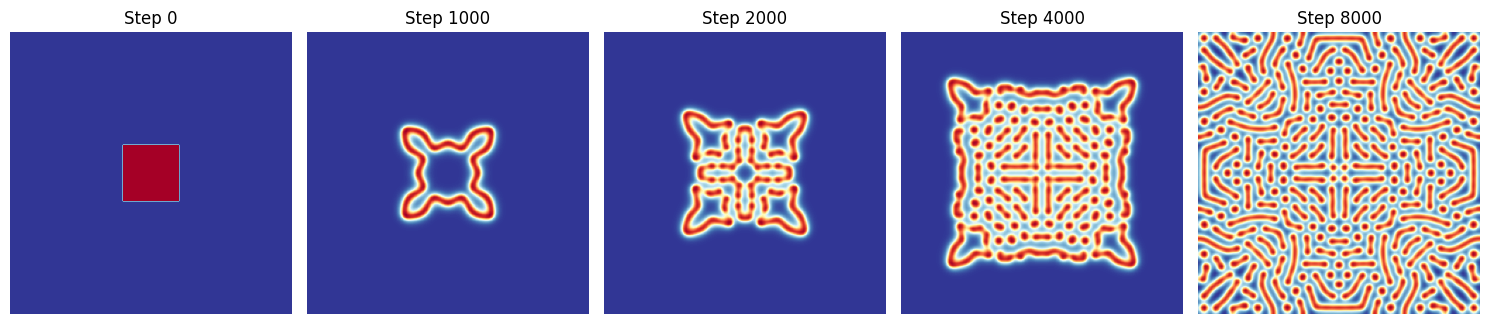

In [22]:
# Visualization of a few states
total_saved = int(steps/save_step)
selected_steps = [
    0, 
    int(total_saved/8), 
    int(total_saved/4), 
    int(total_saved/2), 
    total_saved]  # Indices of the states to visualize

fig, axes = plt.subplots(1, len(selected_steps), figsize=(15, 4))
for i, idx in enumerate(selected_steps):
    U, V = states[idx]
    axes[i].imshow(U, cmap='RdYlBu')
    axes[i].axis('off')
    axes[i].set_title(f'Step {idx*10}')
plt.tight_layout()
plt.show()

## interactive widget for gray-scott system

In [27]:
from ipywidgets import interactive, FloatSlider, IntSlider

def interactive_gray_scott(Du=0.16, F=0.060, k=0.062, steps=1000):

    # hardcoded parameters
    size=200
    Dv = Du/2 # Dv is half Du
    
    # Initial conditions
    U = np.ones((size, size))
    V = np.zeros((size, size))
    mid = int(size // 2)
    width = 20
    U[mid-width:mid+width, mid-width:mid+width] = 0.50
    V[mid-width:mid+width, mid-width:mid+width] = 0.25

    dt = 1.0  # Time step
    num_snapshots = 5  # Desired number of snapshots
    save_step = max(1, steps // (num_snapshots - 1))  # Adjusted calculation for save_step

    # Simulation
    states = simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step)

    # Plotting snapshots
    fig, axes = plt.subplots(1, num_snapshots, figsize=(15, 3))
    snapshot_indices = np.linspace(0, len(states) - 1, num_snapshots, dtype=int)  # Indices for snapshots
    for i, idx in enumerate(snapshot_indices):
        U, V = states[idx]
        # Calculate the actual time step for the title
        actual_step = idx * save_step
        if i < len(axes):  # Check to avoid IndexError
            axes[i].imshow(U, cmap='RdYlBu')
            axes[i].axis('off')
            axes[i].set_title(f'Time Step: {actual_step}')
    plt.tight_layout()
    plt.show()


In [28]:
# Widget sliders
w = interactive(interactive_gray_scott,
                # size=IntSlider(min=100, max=500, step=10, value=200, description='Size'),
                Du=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.12, description='Du'),
                # Dv=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.08, description='Dv'),
                F=FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.060, description='F'),
                k=FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.062, description='k'),
                steps=IntSlider(min=100, max=10000, step=100, value=5000, description='Steps'))

# Display the interactive widget
display(w)

interactive(children=(FloatSlider(value=0.12, description='Du', max=0.2, min=0.01, step=0.01), FloatSlider(val…